<a href="https://colab.research.google.com/github/knagabharathi/Pylib_Data_visualization/blob/main/Dataviz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Q1. Male and female passengers

In the titanic dataset, given below, which observations among the following options are correct?

Consider for the binsize of 20 for histograms of age.

Note: To load the dataset, use the following line of the code

In [4]:
import seaborn as sns
df= sns.load_dataset("titanic")

<Axes: xlabel='age', ylabel='Count'>

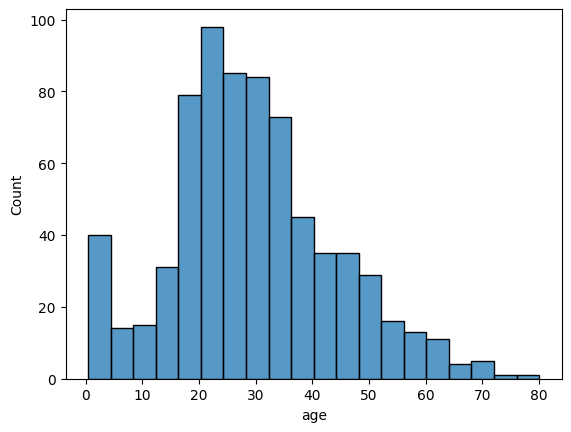

In [7]:
sns.histplot(data = df,x='age',bins=20)

<Axes: xlabel='age', ylabel='sex'>

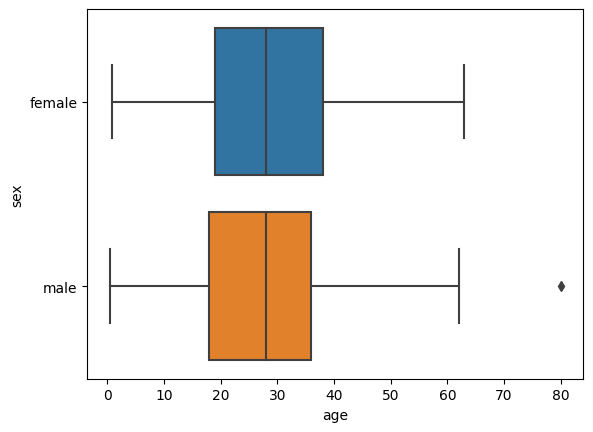

In [24]:
# survived data
df_survive = df[df['survived'] == 1]
sns.boxplot(data= df_survive,x='age',y='sex')

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
df.shape[0]

891

It can be approximated that the survival rate of men is around 20% and that of women is around 75%.

In [29]:
df_survive.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [41]:
df_survive['sex'].value_counts()

female    233
male      109
Name: sex, dtype: int64

In [43]:
fem_sur = df_survive['sex'].value_counts()[0]/df_survive.shape[0] #females

mal_sur = df_survive['sex'].value_counts()[1]/df_survive.shape[0] #males

print(mal_sur, fem_sur)

0.31871345029239767 0.6812865497076024


In [48]:
fem_sur = df_survive['sex'].value_counts()[0]/df['sex'].value_counts()[1] #female

mal_sur = df_survive['sex'].value_counts()[1]/df['sex'].value_counts()[0] #male

print(fem_sur ,mal_sur)

0.7420382165605095 0.18890814558058924


The survival number of women in the age range [20, 40] is comparatively higher than in other age brackets. Consider only those women whose age is between 0 and 60.



In [53]:
df_filt = df[(df['sex'] =='female') &  (df['survived'] == 1) & (df['age'].between(0,60))]

In [54]:
df_filt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


<Axes: xlabel='age', ylabel='count'>

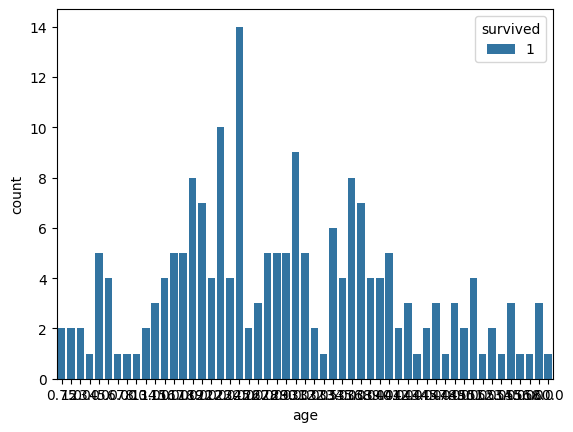

In [60]:
sns.countplot(data= df_filt, x= 'age',hue = 'survived')

<Axes: xlabel='age', ylabel='Count'>

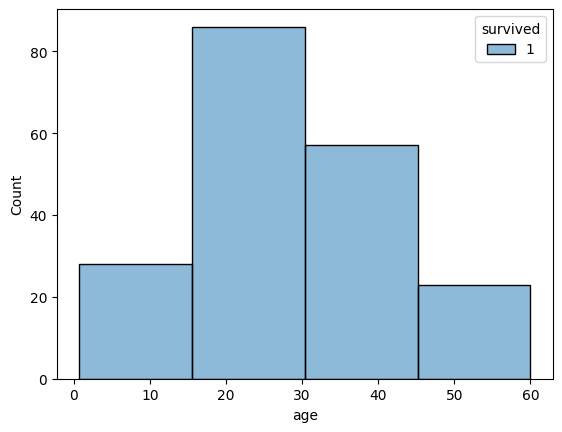

In [62]:
sns.histplot(data= df_filt, x= 'age',hue = 'survived', bins = 4)

#Q2. Solo trip and survival

From the Titanic dataset what can you infer about the impact of ages of passengers and the informationabout if they were alone on the chances of their survival?

The data can be accessed on your colab/jupyter notebook using:

In [64]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
#alone and survived ppl
df[(df['alone']==True) & (df['survived']==1)].shape

#created new column - satisfied this condition
df['col'] = np.where(((df['alone']==True) & (df['survived'] == 1)), 1, 0)


In [14]:
df.head()
df['col'] = df['col'].astype(str)

<Axes: xlabel='age', ylabel='col'>

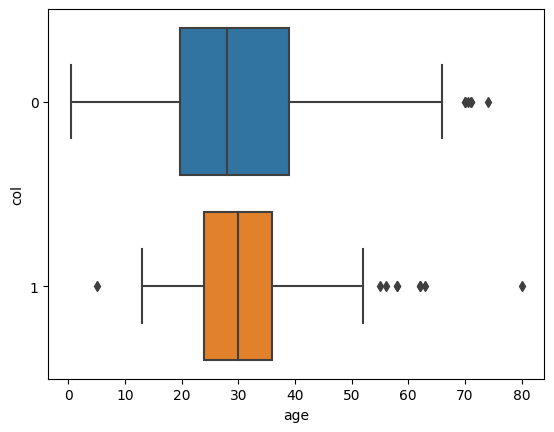

In [15]:
sns.boxplot(data = df, x = 'age', y = 'col')

#Q3. Survival and fare

For the Titanic dataset, what can you say about the impact of fare on the survival dependency differently for all the classes?

The sample of the dataset is shown below:

a.It is observed that the number of passengers from class "Third" who survived was way lesser than those who didn't survive in that class.
b.It is found that mean and median of fare for class "Third" is almost equal.
c.The greater mean fare for class "First", survived category, implies that people who paid more survived with more chances in general for all classes.
d.In the class "Second", it is found that people who paid higher amount of fare (i.e. >60) haven't survived dominantly in that fare range.

#a & d

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,col
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [30]:
df[df['class']=='Third']['survived'].value_counts()

0    372
1    119
Name: survived, dtype: int64

In [35]:
print(df[df['class']=='Third']['fare'].mean())
df[df['class']=='Third']['fare'].median()

13.675550101832993


8.05

In [39]:
df_surv = df[df['survived']==1]

In [44]:
df_surv['class'].value_counts()

First     136
Third     119
Second     87
Name: class, dtype: int64

In [59]:
df_sec = df[df['class']=='Second']

In [62]:
df_sec[df_sec['fare'] > 60]['survived'].value_counts()

0    5
1    2
Name: survived, dtype: int64

#Q4. Right observation

In [16]:
df1 = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/008/445/original/WA_Fn-UseC_-Telco-Customer-Churn_%281%29.csv?1659686569')

In [18]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='PaymentMethod', ylabel='MonthlyCharges'>

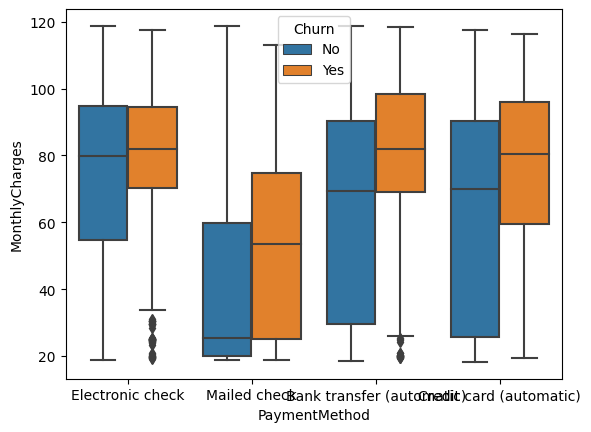

In [20]:
sns.boxplot(data = df1, x = 'PaymentMethod', y = 'MonthlyCharges', hue = 'Churn')

#Q5. Barplot for profit


Given a dataframe consisting of sales data, with columns "Sale ID", "Source" and "Profit", find out which advertisement source is responsible for how much of the sales. Create a Bar plot to find relation between Advertisement Source and Profit.

    x-axis should be "Source"
    y-axis should be "Profit"

The output will be verified with the above attributes.

In [ ]:
sid = eval(input())
source = eval(input())
prof = eval(input())
df = pd.DataFrame({'Sale ID': sid, 'Source': source, 'Profit':prof})

# Plot the barplot after "bar = "
bar = sns.barplot(data = df, x='Source', y='Profit')

#Q6. Visualize Correlation

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables.

Higher the |coeff|, more is the correlation.

a. features pclass and fare are negatively correlated.

b. features alone and adult_male are weakly positively correlated.

c. Diagonal features are showing the correlation between themselves and therefore it is 1.

#Q7. Jointplot Relation

Given a dataframe consisting of sales data, with columns as "Sale ID", "Selling Price" and "Profit". Create a Joint plot to find the relation between Selling Price and Profit with xlim between 500 to 1500 and ylim between 100 to 250. Other parameters would be:

    x-axis: Selling Price
    y-axis: Profit
    kind: reg
    colour: green

The output will be verified with the above attributes.

In [22]:
df2 = pd.DataFrame({
'Sale ID':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
'Selling Price':[479.99, 1249.99, 649.99, 399.99, 699.99, 1249.99, 1349.99, 999.99, 649.99, 479.99, 1349.99, 1249.99, 649.99, 649.99, 999.99, 399.99, 699.99, 999.99, 399.99, 649.99]
,'Profit':[143.39, 230.89, 118.64, 72.09, 98.09, 230.89, 180.34, 146.69, 122.34, 143.39, 180.34, 230.89, 122.34, 118.64, 146.69, 72.09, 98.09, 146.69, 72.09, 122.34]
})

In [23]:
df2

,Sale ID,Selling Price,Profit
0,1,479.99,143.39
1,2,1249.99,230.89
2,3,649.99,118.64
3,4,399.99,72.09
4,5,699.99,98.09
5,6,1249.99,230.89
6,7,1349.99,180.34
7,8,999.99,146.69
8,9,649.99,122.34
9,10,479.99,143.39


Yes, this is a JointPlot


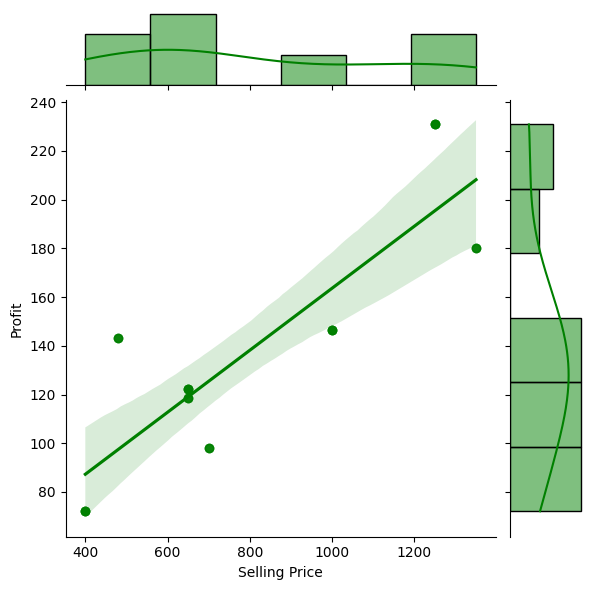

In [24]:
#Plot the jointplot after "jp = "
jp = sns.jointplot(data= df2, x='Selling Price', y ='Profit', kind='reg', color='green' )
print('Yes, this is a JointPlot')
plt.show()

#Q8. Subplot it

A certain company is going to present its data to its new Chief of Management.

The data scientists compiled the data into 4 columns: month, mean of the sales, demo product sales in the last 12 months, and major product sales in the last 12 months.

Help the data scientists plot this data visually into 3 subplots:

    The first subplot should be a line plot, with x-axis as month_number, y-axis as the mean_sales column, title as "trend graph", x label as "month" and y label as "sales"
    The second subplot should be a bar plot, with x-axis as month_number, y-axis as the demo_prod column, title as "demo prod sales", x label as "month" and y label as "sales"
    The third subplot should be a scatter plot, with x-axis as month_number, y-axis as the major_prod column, title as "distribution of major prod sales", x label as "month" and y label as "scattered points"

Also, the figure size should be set to [20, 5]

The output will be verified with the above attributes. This will be taken care of in the backend.